# Traitement des données trafic
*Projet Pully/EPFL/Swisscom*

Ce script sert à traiter les données provenant des capteurs infrarouges, des boucles à induction et Swisscom.

 - Input: 
     -  Fichiers CSV ou TXT contenant les relevés pour la période donnée, dans le format natif du logiciel 
 - Output:
     - Statistiques pour la période donnée (débits maximaux sur la période, débits horaires, HPM, HPS)
     - Graphiques
     - Comparatifs 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
from pandas import Series, DataFrame
from importlib import reload
from IPython.display import display, Markdown, Latex, HTML
import visualisation as vs
import pdb

### Importation des données

In [2]:
import importdata
reload(importdata)
from importdata import importPed, importVeh, importSC, importTL


#fichiers
ped_file = '../pietons_110918_270918.csv' #fichier piétons
#sc_file = '../sc_110918_260918.csv' #fichier swisscom
sc_file = 'scmodes_1209-2609.csv' #fichier swisscom
veh_file = '../110918_270918.csv' #fichier vehicules
tl_file = '../TL/tl_sep2018.xlsx'#fichier TL

#periode de calcul
start = pd.to_datetime('09/12/2018 00:00')
end = pd.to_datetime('09/26/2018 23:00')

#importation des fichiers

ped_data = importPed(ped_file,start,end)

veh_data = importVeh(veh_file,start,end)
sc_data = importSC(sc_file, start,end, mode = True)
tl_data = importTL(tl_file, start, end, sheet = 1)

sc_data.drop('Total', axis=1, inplace = True)
sc_data.rename(columns={'Road': 'Total'}, inplace = True)
    
#verification
#print('PIETONS:')
#print(ped_data.head())
#print('\n')
#print('VOITURES:')
#print(veh_data)
#print('\n')
#print('SWISSCOM:')
#print(sc_data.head())
#print('\n')
#print('TL:')
#print(tl_data.head())


0                Date  Total  Highway   days hours DayWeek
0 2018-09-12 00:00:00     47       23  12/09    00     Wed
1 2018-09-12 01:00:00      0        0  12/09    01     Wed
2 2018-09-12 02:00:00      0        0  12/09    02     Wed
3 2018-09-12 03:00:00      0        0  12/09    03     Wed
4 2018-09-12 04:00:00      0        0  12/09    04     Wed


## Graphiques

In [3]:
import dash
reload(dash)
reload(vs)

ped_tot = ped_data.copy()
scd = sc_data.copy()
vehd = veh_data.copy()
tld = tl_data.copy()

dash.genStats(ped_tot, vehd, scd,tld)


In [4]:
#Création d'un tableau avec toutes les valeurs pour la période sélectionnée
ped = ped_data[['Date','Total']]
sc = sc_data[['Date','Total']]
veh = veh_data[['Date','Total']]
tl = tl_data[['Date','Total']]
#f_occ = 1.1 #facteur d'occupation
#veh2 = np.multiply(veh, f_occ)

bigd = ped.set_index('Date').join(veh.set_index('Date'), lsuffix = "_piet", rsuffix ="_veh")
bigd = bigd.join(tl.set_index('Date'), rsuffix = "_tl")
bigd =bigd.join(sc.set_index('Date'), rsuffix ="_sc")
bigd.rename(columns={"Total_piet": "Pietons", "Total_veh": 'TIM', "Total": "TC", "Total_sc": "Swisscom" }, inplace=True)

bigd.reset_index(inplace = True)

big2 = bigd.copy()


,Date,Pietons,TIM,TC,Swisscom
0,2018-09-12 00:00:00,1.000000,39.0,2.8,47
1,2018-09-12 01:00:00,0.000000,15.0,0.0,0
2,2018-09-12 02:00:00,0.000000,9.0,0.0,0
3,2018-09-12 03:00:00,0.000000,15.0,0.0,0
4,2018-09-12 04:00:00,1.000000,18.0,0.0,0
5,2018-09-12 05:00:00,2.000000,38.0,1.0,72
6,2018-09-12 06:00:00,23.000000,229.0,8.8,326
7,2018-09-12 07:00:00,102.000000,509.0,38.4,918
8,2018-09-12 08:00:00,164.000000,574.0,21.4,846
9,2018-09-12 09:00:00,220.082678,509.0,21.8,475


In [5]:
#calcul des parts modales
bigd = bigd.groupby(bigd.Date.dt.hour).mean()

bigd['Total'] = bigd.Pietons + np.multiply(bigd.TIM,1.1) + bigd.TC 
perc_trafic = bigd.copy()
perc_trafic['Pietons'] = 100* perc_trafic['Pietons']/perc_trafic['Total']
perc_trafic['TIM'] = 100* np.multiply(perc_trafic['TIM'],1.1)/perc_trafic['Total'] 
perc_trafic['TC'] = 100* perc_trafic['TC']/perc_trafic['Total']
perc_trafic.drop(['Swisscom'], axis = 1, inplace = True)
perc_trafic.index.rename("Heure", inplace = True)



In [6]:
#calcul des parts modales  pour les jours ouvrables
big2['DayWeek'] = big2.Date.dt.weekday
maskwd = (big2.DayWeek >= 5)

big_ouvr = big2.loc[maskwd].copy()

big_ouvr = big_ouvr.groupby(big_ouvr.Date.dt.hour).mean()

big_ouvr['Total'] = big_ouvr.Pietons + big_ouvr.TIM + big_ouvr.TC 
perc_ouvr = big_ouvr.copy()
perc_ouvr['Pietons'] = 100* perc_ouvr['Pietons']/perc_ouvr['Total']
perc_ouvr['TIM'] = 100* np.multiply(perc_trafic['TIM'],1.1)/perc_ouvr['Total'] 
perc_ouvr['TC'] = 100* perc_ouvr['TC']/perc_ouvr['Total']
perc_ouvr.drop(['Swisscom'], axis = 1, inplace = True)
perc_ouvr.index.rename("Heure", inplace = True)



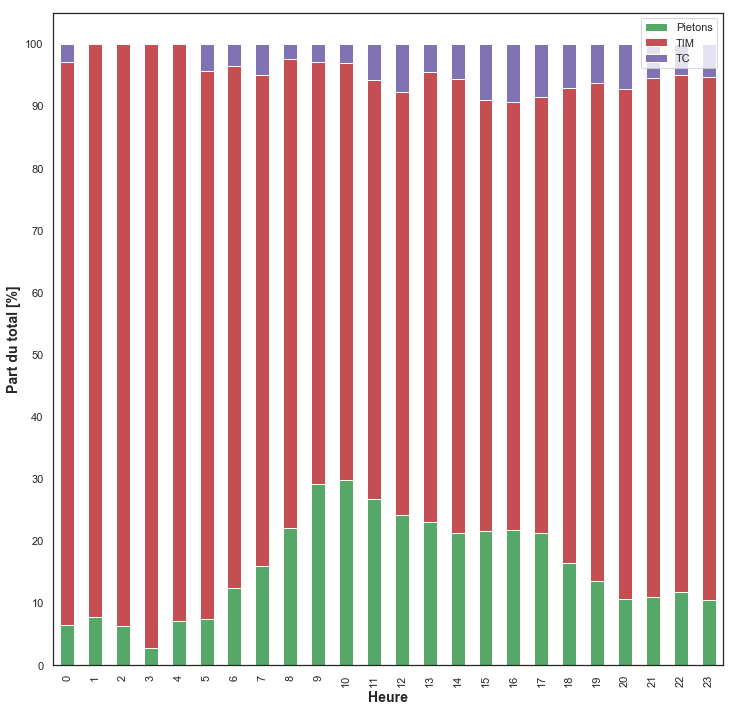

In [7]:
#Visualisation des parts modales pour toute la semaine

sns.set()
sns.set_color_codes()
sns.set_style("white")
pal = ['g', 'r', 'm']
f, ax1 = plt.subplots(figsize=(12,12))
perc_trafic[['Pietons', 'TIM', 'TC']].plot(ax= ax1,kind='bar', stacked = True, color = [pal[0], pal[1], pal[2]] )
ax1.set_title("Répartition modale horaire", {'fontweight': 'bold'})
ax1.set_ylabel("Part du total [%]", {'fontweight': 'bold', 'fontsize': 14})
ax1.set_xlabel("Heure", {'fontweight': 'bold', 'fontsize': 14})
ax1.set_yticks(np.arange(0,101,10))

plt.show()

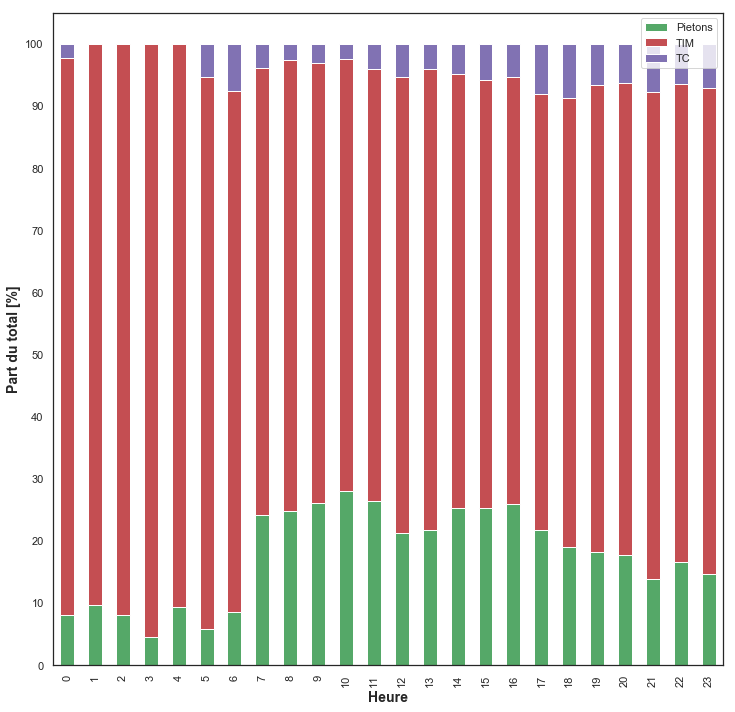

In [8]:
#Visualisation des parts modales pour la semaine ouvrable

f, ax1 = plt.subplots(figsize=(12,12))
perc_ouvr[['Pietons', 'TIM', 'TC']].plot(ax= ax1,kind='bar', stacked = True, color = [pal[0], pal[1], pal[2]] )
ax1.set_title("Répartition modale horaire (week-end)", {'fontweight': 'bold'})
ax1.set_ylabel("Part du total [%]", {'fontweight': 'bold', 'fontsize': 14})
ax1.set_xlabel("Heure", {'fontweight': 'bold', 'fontsize': 14})
ax1.set_yticks(np.arange(0,101,10))

plt.show()

## Exportation

In [ ]:
#Exportation des fichiers pour réutilisation 
str_start = start.strftime("%d%m")
str_end = end.strftime("%d%m")
filename = str_start+"-"+ str_end

bigd.to_csv(filename + "_trafictot.csv")
ped_tot.to_csv(filename+"_P.csv")
veh_data.to_csv(filename+"_V.csv")
#sc_data.to_csv(filename+"_SC.csv")

print('Exportation terminée')
